Univariate Groundwater Time Series Analysis and Forecasting with Python

 About Time Series analysis
* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
* Time series forecasting is the use of a model to predict future values based on previously observed values.

In [59]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## The Data

<p>We are using Ground Water Data.</p>

In [60]:
# read the excel file
furniture = pd.read_excel("Budi_data3_sumur_4.xls")
furniture.head()

,Row ID,Order ID,Measurement Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,GWE,Quantity,Discount,Profit
0,1,0,2005-01-01,2005-01-01,Standard Class,0,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,3001.707500,1.0,1.0,1.0
1,2,0,2005-02-01,2005-02-01,Standard Class,1,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,3001.728333,1.0,1.0,1.0
2,3,0,2005-03-01,2005-03-01,Standard Class,2,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,3001.749167,1.0,1.0,1.0
3,4,0,2005-04-01,2005-04-01,Standard Class,3,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,3001.770000,1.0,1.0,1.0
4,5,0,2005-05-01,2005-05-01,Standard Class,4,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,3001.790833,1.0,1.0,1.0


In [61]:
furniture.describe()

,Row ID,Order ID,Customer ID,Postal Code,GWE,Quantity,Discount,Profit
count,192.000000,192.0,192.000000,192.000000,192.000000,144.0,144.0,144.0
mean,96.500000,0.0,95.500000,92320.687500,3002.665370,1.0,1.0,1.0
std,55.569776,0.0,55.569776,21.833407,0.598404,0.0,0.0,0.0
min,1.000000,0.0,0.000000,92307.000000,3001.707500,1.0,1.0,1.0
25%,48.750000,0.0,47.750000,92307.000000,3002.071875,1.0,1.0,1.0
50%,96.500000,0.0,95.500000,92307.000000,3002.754167,1.0,1.0,1.0
75%,144.250000,0.0,143.250000,92331.250000,3003.150000,1.0,1.0,1.0
max,192.000000,0.0,191.000000,92379.000000,3003.765385,1.0,1.0,1.0


## Data Preprocessing

In [62]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Measurement Date,GWE
0,2005-01-01,3001.707500
1,2005-02-01,3001.728333
2,2005-03-01,3001.749167
3,2005-04-01,3001.770000
4,2005-05-01,3001.790833


In [63]:
# Sort the Order Date 
furniture = furniture.sort_values('Measurement Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

  Measurement Date        GWE
0       2005-01-01  3001.7075


Measurement Date    0
GWE                 0
dtype: int64

In [64]:
# grouping sales according to Order Date
furniture.groupby('Measurement Date')['GWE'].sum().reset_index()

# min and max values of Order Date
print(furniture['Measurement Date'].min())
print(furniture['Measurement Date'].max())

2005-01-01 00:00:00
2020-12-01 00:00:00


In [65]:
#set 'Order Date' as index
furniture = furniture.set_index('Measurement Date')
furniture.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Measurement Date', length=192, freq=None)

In [66]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['GWE'].resample('MS').mean()
y['2017':]

Measurement Date
2017-01-01    3003.150000
2017-02-01    3003.185000
2017-03-01    3003.220000
2017-04-01    3003.255000
2017-05-01    3003.290000
2017-06-01    3003.291818
2017-07-01    3003.293636
2017-08-01    3003.295455
2017-09-01    3003.297273
2017-10-01    3003.299091
2017-11-01    3003.300909
2017-12-01    3003.302727
2018-01-01    3003.304545
2018-02-01    3003.306364
2018-03-01    3003.308182
2018-04-01    3003.310000
2018-05-01    3003.330000
2018-06-01    3003.350000
2018-07-01    3003.370000
2018-08-01    3003.390000
2018-09-01    3003.410000
2018-10-01    3003.430000
2018-11-01    3003.450000
2018-12-01    3003.470000
2019-01-01    3003.490000
2019-02-01    3003.510000
2019-03-01    3003.530000
2019-04-01    3003.550000
2019-05-01    3003.560769
2019-06-01    3003.571538
2019-07-01    3003.582308
2019-08-01    3003.593077
2019-09-01    3003.603846
2019-10-01    3003.614615
2019-11-01    3003.625385
2019-12-01    3003.636154
2020-01-01    3003.646923
2020-02-01    3003.65

## Data Visualization

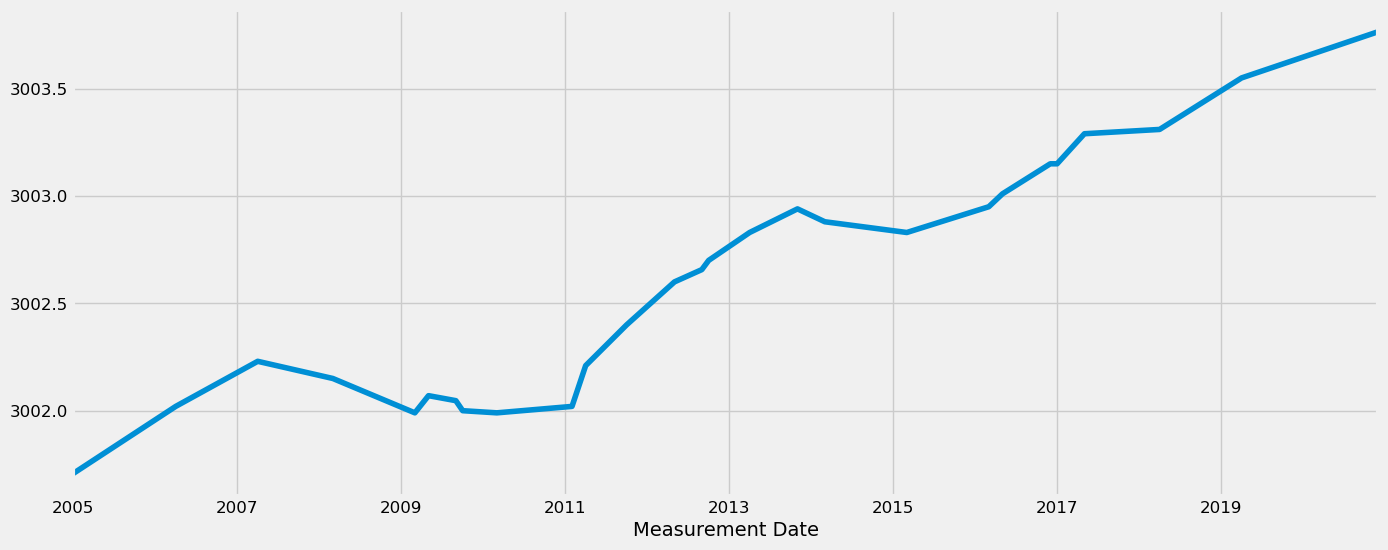

In [67]:
y.plot(figsize = (15, 6))
plt.show()

# Time-series decompositon 
* It allows us to decompose our time series into three distinct components
<ul>
<li>Trend</li>
<li>Seasonality</li>
<li>Noise</li>
</ul>


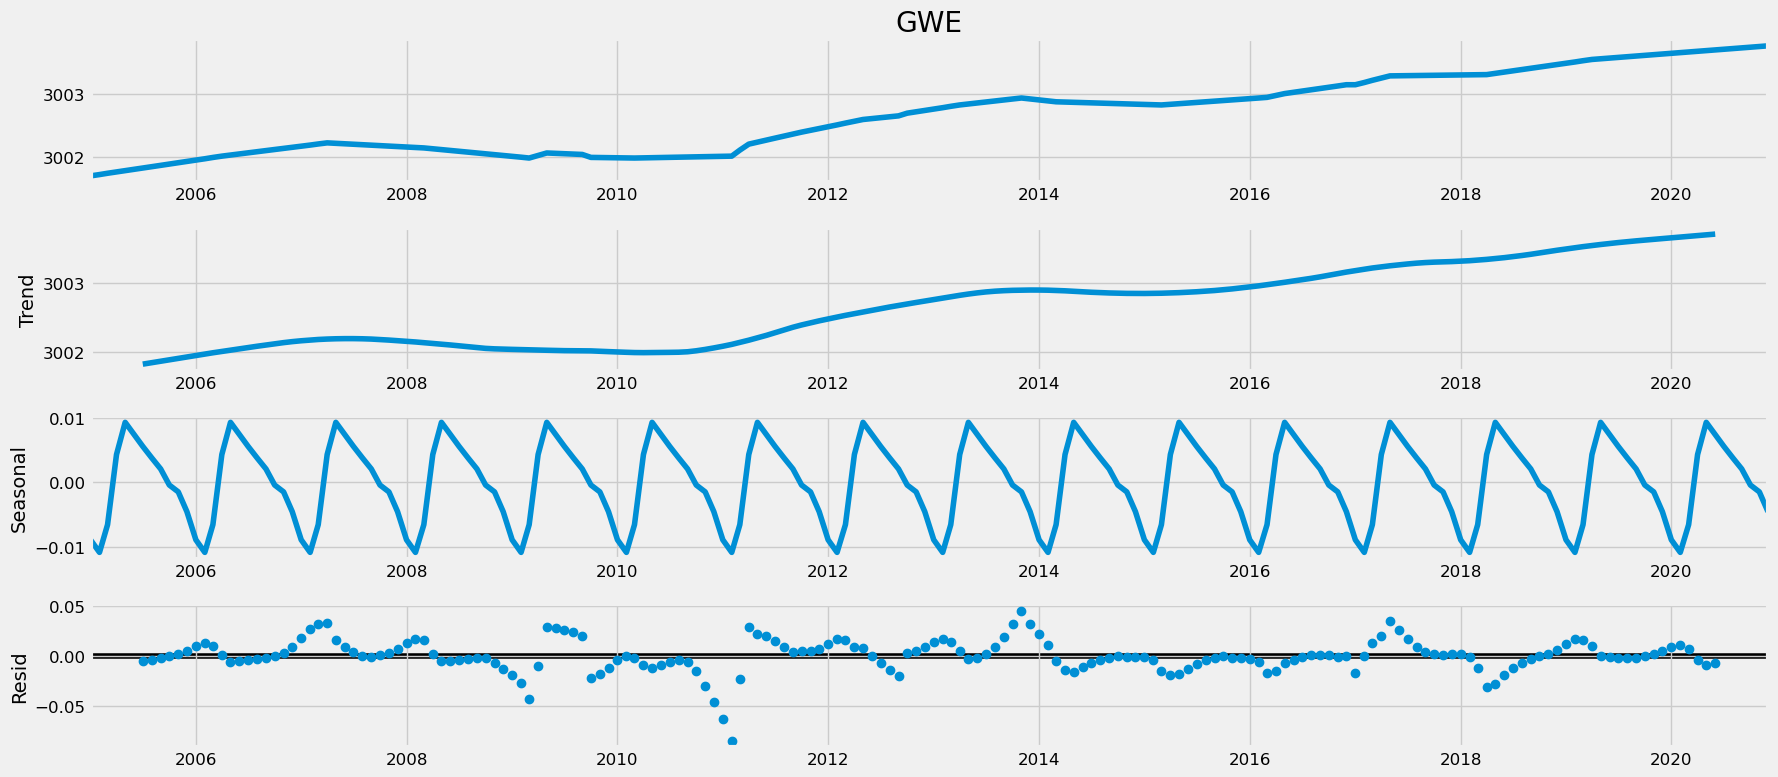

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA model

<p>
    <b><i>About ARIMA model</i></b>
<ul>
    <li>ARIMA stands for <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA models are denoted with the notation <i>ARIMA(p, d, q)</i></li>
    <li>These three parameters account for <i>seasonality, trend, and noise</i> in data</li>
</ul>
</p>

In [69]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [70]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3621.6585662225443


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3623.0333913475974
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-83.749611096662
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-146.2474400192707
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1365.1023797422667


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1354.477144407263
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-156.4265628322193
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-160.39833819861815
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3363.7450396925683


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3629.2798744549837
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-323.0854005802903
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-384.2591092431775


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1099.3544853785475
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3538.811263414065
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-395.5797263403575
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-398.73242989452024
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-955.2715245180634
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-978.5911208487285
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-862.7437403951676


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-922.7494256137857
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-986.6591838442826
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-984.7985514510706
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-880.4153832209869
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-927.8398034887452
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-1086.5056993823464
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-1097.601701893831


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-949.1027025478988
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-1021.8706633073239
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-1099.7173021152335
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-1097.7330597477285
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-972.6483815510519
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-962.275778416847


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-479.6599687576861


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-397.9964265817954
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-861.3998346370959


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-811.2709243152249


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-638.9334170283737


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-677.5345122811531
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-877.3683075633709


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-874.4475366457999
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:189.16309042585908
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-588.6632129947977
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-948.2544330229225


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-895.5713201850335


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-902.2490429324012


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-884.9770630276095


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-970.6792259372612
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-964.0222804412606
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-1155.811852863635
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-1154.5900210098564
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-967.0009128171479
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-1060.5151096616485
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-1154.6638022344562
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-1152.7325770588293
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-1006.5179796098048


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-1057.4614789156062
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-1153.9134710641729
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-1152.6968518212539
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-965.4281692193688


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-1057.7334982802236
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-1152.7698071137377
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-1150.9145176830339
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-1005.4717037984547
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-1056.6440236447404


###### Fitting the ARIMA model

In [71]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6520      0.056     11.578      0.000       0.542       0.762
ma.L1          0.0812      0.092      0.887      0.375      -0.098       0.261
ar.S.L12      -0.4387      0.035    -12.614      0.000      -0.507      -0.371
sigma2         0.0002    8.1e-06     24.981      0.000       0.000       0.000


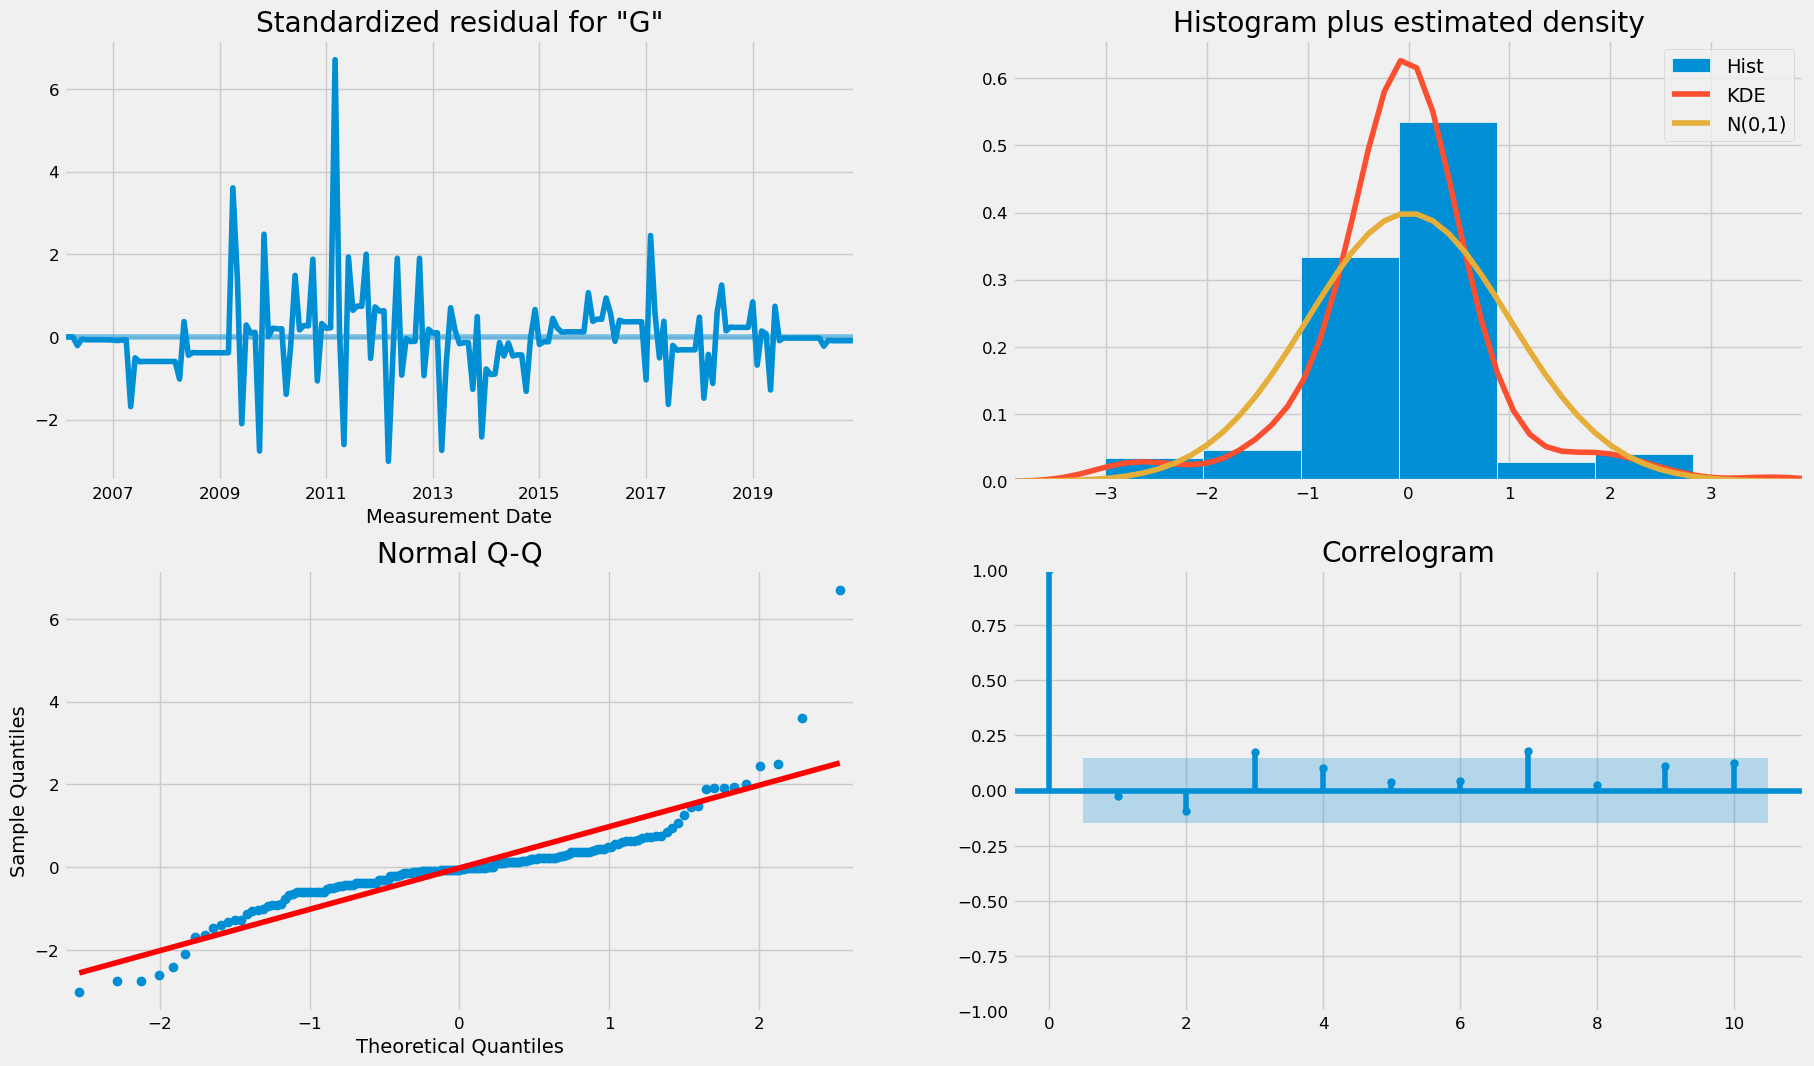

In [72]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (20, 12))
plt.show()

<p>It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.</p>

###### Validating Forecasts

<p>
To help us understand the accuracy of our forecasts, we compare predicted GWE to real GWE of the time series, and we set forecasts to start at <i>2017–01–01</i> to <i>the end of the data.</i>
</p>

In [81]:
prediction = result.get_prediction(start = pd.to_datetime('2007-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower GWE,upper GWE
Measurement Date,,
2007-01-01,3002.148532,3002.208838
2007-02-01,3002.167043,3002.225598
2007-03-01,3002.185668,3002.241458
2007-04-01,3002.203187,3002.258960
2007-05-01,3002.218816,3002.274589
...,...,...
2020-08-01,3003.695724,3003.751497
2020-09-01,3003.706494,3003.762267
2020-10-01,3003.717263,3003.773036


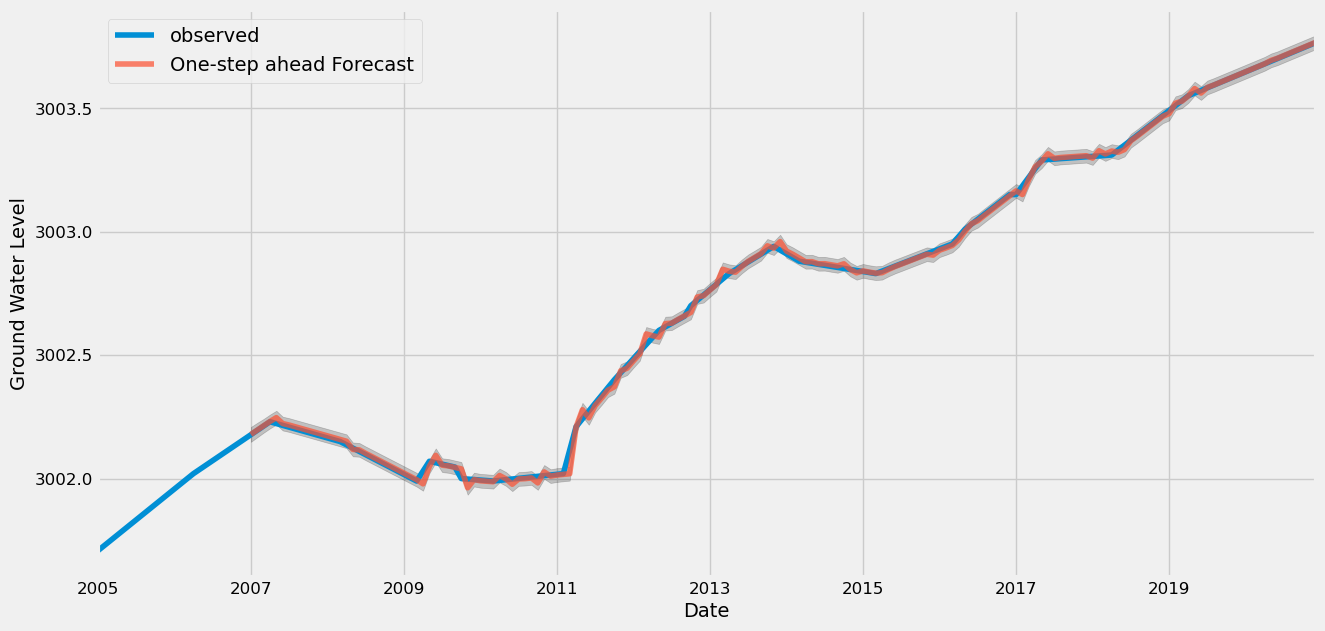

In [95]:
#Visualize the forecasting
ax = y['2005':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Ground Water Level')
plt.legend()
plt.show()

<p>The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.
</p>

###### Error Analysis

In [90]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2007-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 4)))


The Mean Squared Error of our forecasts is 0.0002
The Root Mean Squared Error of our forecasts is 0.0147


##### Producing and visualizing forecasts

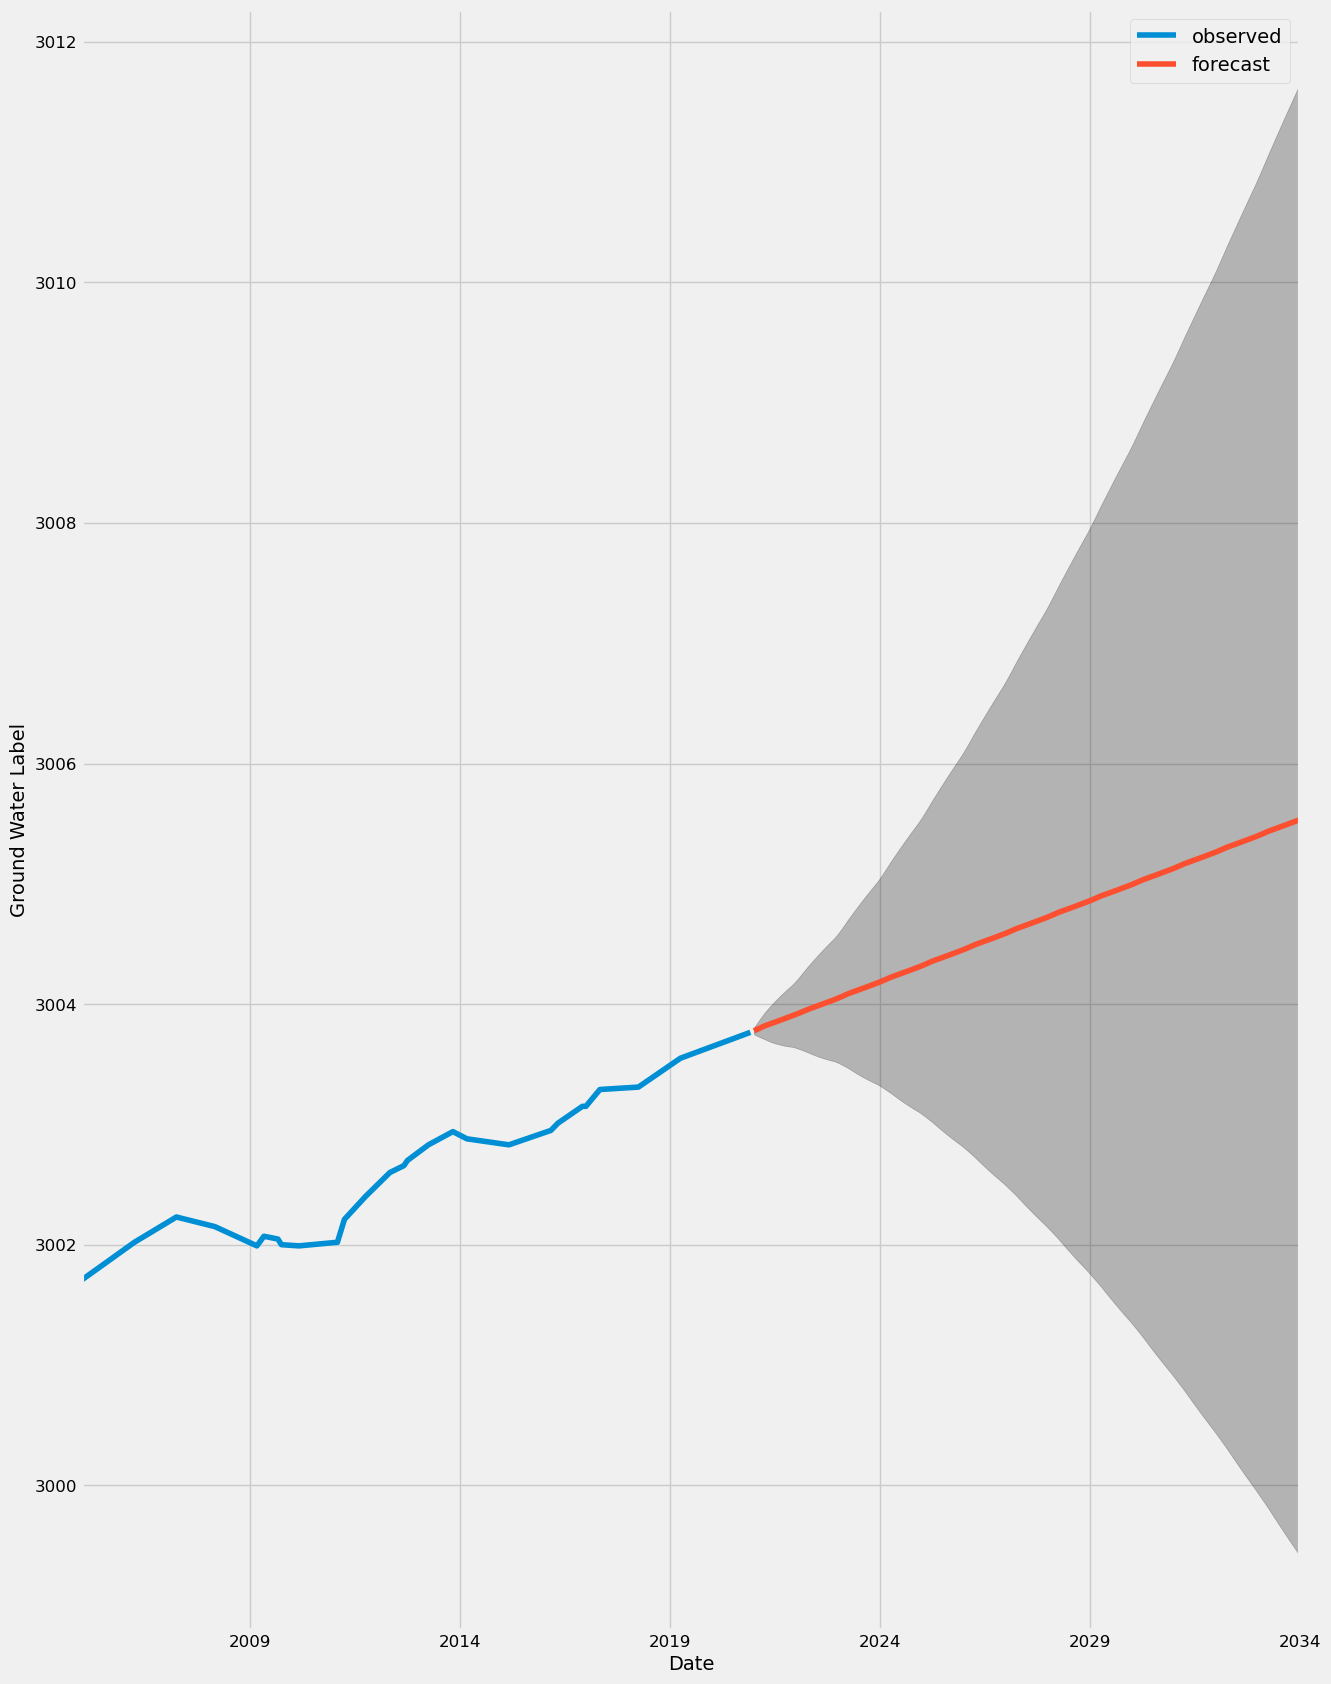

In [89]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 157)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 20))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Ground Water Label')

plt.legend()
plt.show()


## Summary

<ul>
<li>Our model clearly captured Ground Water seasonality.</li>
<li>As we forecast further out into the future, it is natural for us to become less confident in our values.</li>
<li>This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.</li>

</ul>

In [85]:
pred_uc.predicted_mean['2030'].describe()

count      12.000000
mean     3005.057424
std         0.039953
min      3004.993897
25%      3005.028785
50%      3005.058325
75%      3005.087697
max      3005.117238
Name: predicted_mean, dtype: float64

In [86]:
df = pd.DataFrame(pred_uc.predicted_mean['2030'])
display(df)

,predicted_mean
2030-01-01,3004.993897
2030-02-01,3005.006229
2030-03-01,3005.018997
2030-04-01,3005.032048
2030-05-01,3005.042471
2030-06-01,3005.053014
2030-07-01,3005.063636
2030-08-01,3005.074309
2030-09-01,3005.085015
2030-10-01,3005.095744


In [87]:
aax_new = pred_ci.DataFrame()
display(aax_new)

AttributeError: 'DataFrame' object has no attribute 'DataFrame'